<a href="https://colab.research.google.com/github/GOVINDFROMINDIA/Counterfeit-Currency-Detection-with-Generative-Adversarial-Networks-and-Ensemble-Methodds-/blob/main/Denomination_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image, ImageFilter
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

1/1 [==============================] - 0s 85ms/step


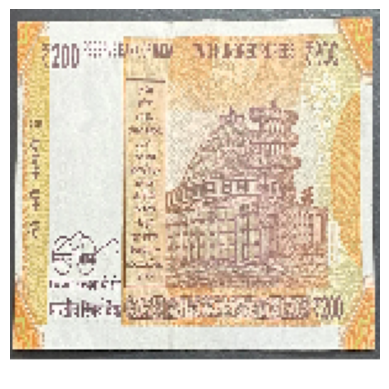

Predicted Class: 200_Back
Prediction Probabilities: [[1.11646439e-18 1.93289615e-15 1.21933452e-26 4.92703776e-15
  8.45644822e-12 1.00000000e+00 7.94938179e-21 7.79790457e-13
  1.01926054e-11]]


In [ ]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model architecture from JSON
with open('/content/drive/MyDrive/Currency/Major-Project/currency_cnn_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Load the model architecture
model = model_from_json(loaded_model_json)

# Load model weights
model.load_weights('/content/drive/MyDrive/Currency/Major-Project/currency_cnn_weights.h5')

# Define the target size for the image
img_width, img_height = 150, 150

# Define the image path
image_path = '/content/drive/MyDrive/Currency/Major-Project/₹200/Fake/Back/b100.png'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255

# Predict the class
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Define the class labels
class_labels = {
    0: '50_Front',
    1: '50_Back',
    2: '100_Front',
    3: '100_Back',
    4: '200_Front',
    5: '200_Back',
    6: '500_Front',
    7: '500_Back',
    8: 'Demonitized'
}

# Get the predicted class label
predicted_class = class_labels[predicted_class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Display the prediction
print("Predicted Class:", predicted_class)
print("Prediction Probabilities:", prediction)
